<a href="https://colab.research.google.com/github/judith-chrysolite/Employees-Burnout-Prediction/blob/main/Employees_Burnout_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Burnout Prediction**

Employee burnout is a state of physical, emotional and mental exhaustion caused by excessive and prolonged stress. It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

we will be exploring the use of regression techniques to predict employee burnout. By analyzing a dataset containing various factors that may contribute to burnout such as workload, mental fatigue job and work-life balance, we can develop a model to identify individuals who may be at risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their employees.


**Dataset: Are Your Employees Burning Out?**

This [dataset](http://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out?select=train.csv) consists of 9 columns as follows:


* Employee ID: The unique ID allocated for each employee (example: fffe390032003000)
* Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)
* Gender: The gender of the employee (Male/Female)
* Company Type: The type of company where the employee is working (Service/Product)
* WFH Setup Available: Is the work from home facility available for the employee (Yes/No)
* Designation: The designation of the employee of work in the organization. In the range of [0.0, 5.0] bigger is higher designation.
* Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours. In the range of [1.0, 10.0](higher means more resource)
* Mental Fatigue Score: The level of fatigue mentally the employee is facing. In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
* Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working. In the range of [0.0, 1.0] where the higher the value is more is the burn out.

# IMPORTING NECESSARY LIBRARIES

In [72]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import os

# LOADING DATASET

In [73]:
data= pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

# DATA OVERVIEW

In [74]:
data.shape

(22750, 9)

In [75]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [76]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


As the table shows, this dataframe contains 22750 columns where each one represents an observation of our true data. Also, as we can see in the column "Mental Fatigue Score" there are also NaN values. Let's count them.

In [77]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [78]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [79]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [80]:
data.info()#summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [81]:
data.isnull().sum()#count of N.o of missing values of each columns

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [82]:
data.isnull().sum().values.sum()#find total n.o of missing values in dataset

4622

# Exploratory Data Analysis

There are NaN values on our target ("Burn Rate") and also in Resource Allocation and Mental Fatigue Score columns. As we are going to perform supervised linear regression, our target variable is needed to do so. Therefore, this 1124 rows with NaN values must be dropped off of our dataframe.

In [83]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


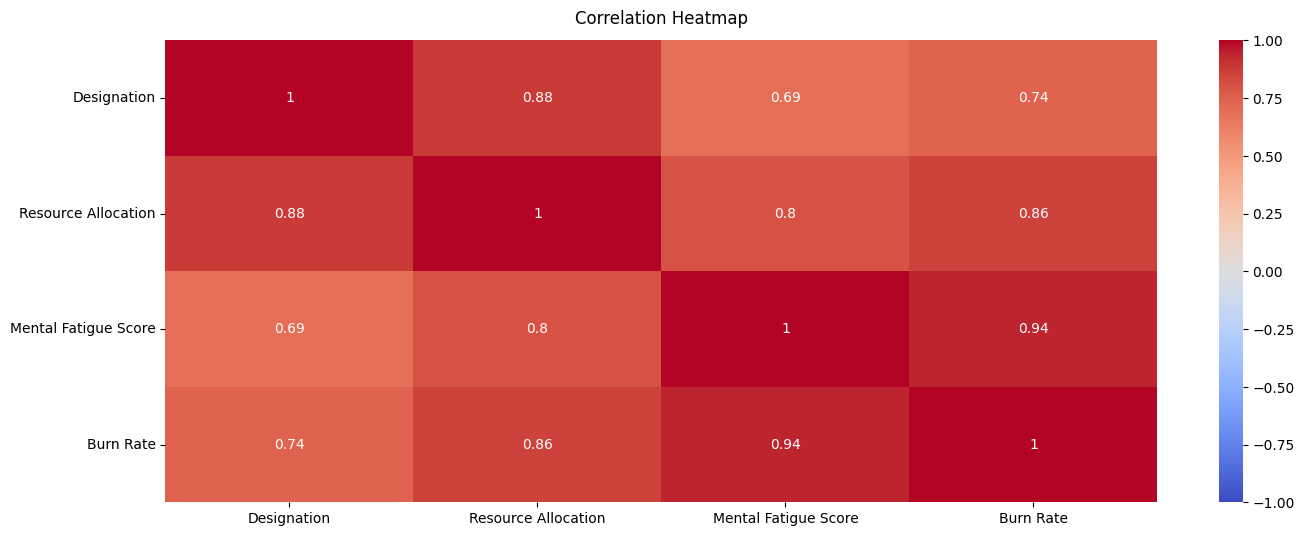

In [84]:
# Calculate the correlation matrix with numeric_only=True
correlation_matrix = data.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Save and show the heatmap
plt.savefig("correlation_heatmap.png")
plt.show()

These two variables are strongly correlated with target variable, therefore , important to estimate it.


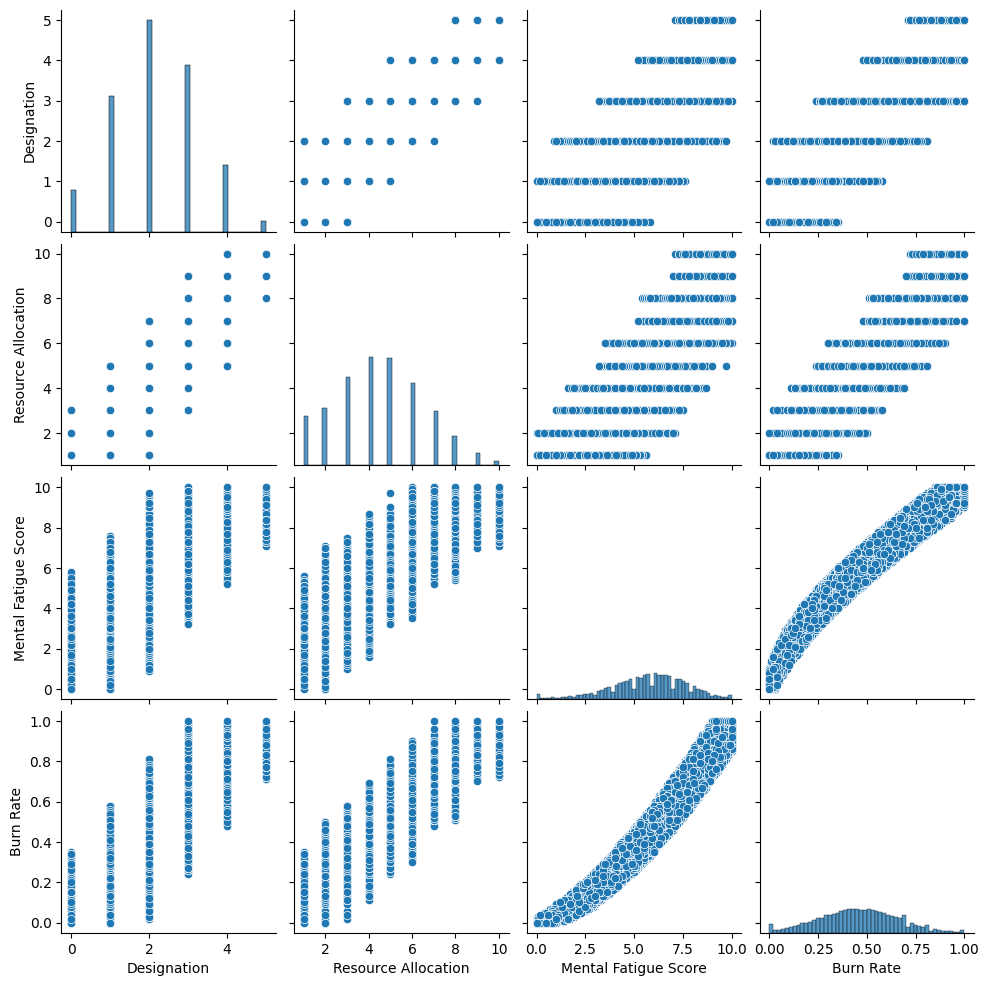

In [85]:
sns.pairplot(data)
plt.show()

Drop off all observations with NaN values of our dataframe.

In [86]:
data = data.dropna()

In [87]:
data.shape

(18590, 9)

Analyzing what type of data is each variable.

In [88]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


The values that each variable contains.

The employees ID doesn't provide any useful information and, therefore, they must be dropped.

In [89]:
data = data.drop('Employee ID', axis = 1)

Unsupported Cell Type. Double-Click to inspect/edit the content.

Checking the correlation of Date of Joining with Target variable

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

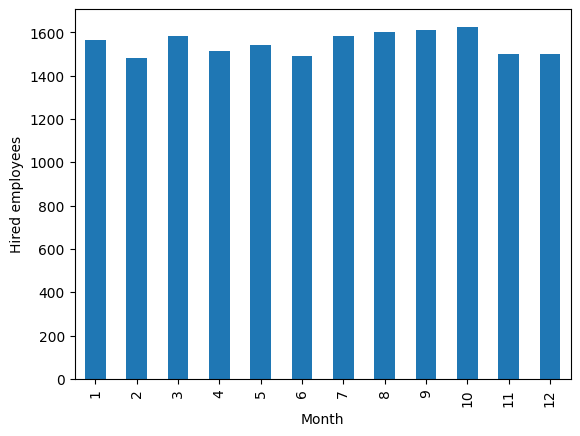

In [90]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()
# Convert the 'Date of Joining' column to datetime format with nanosecond precision
data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
# Extract the month from 'Date of Joining' and group by month
# Count the number of employees hired each month and plot the result as a bar chart
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")

The date of joining is uniform distributed with values between 2008-01-01 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with de days worked

In [91]:
# Creating a reference date column
#The pd.to_datetime function converts the string "2008-01-01" to a datetime object.
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Convert 'Date of Joining' to datetime, subtract reference date, and extract number of days
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [92]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])  # Select columns with numeric data types
correlation = numeric_data.corr()['Burn Rate']  # Calculate the correlation of 'Burn Rate' with other numeric columns
print(correlation)  # Print the correlation values

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [93]:
# Calculate the correlation matrix for numeric columns only.
#Extract the correlation values for 'Burn Rate' with all other numeric features (including itself)
data.corr(numeric_only=True)['Burn Rate'][:]
#Print the correlation values

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days,0.000309


We observed that there is no strong correlation between Date of Joining and Burn Rate.So, we are dropping the column Date of Joining.

In [94]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [95]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


# **Now analysing the categorical variables**

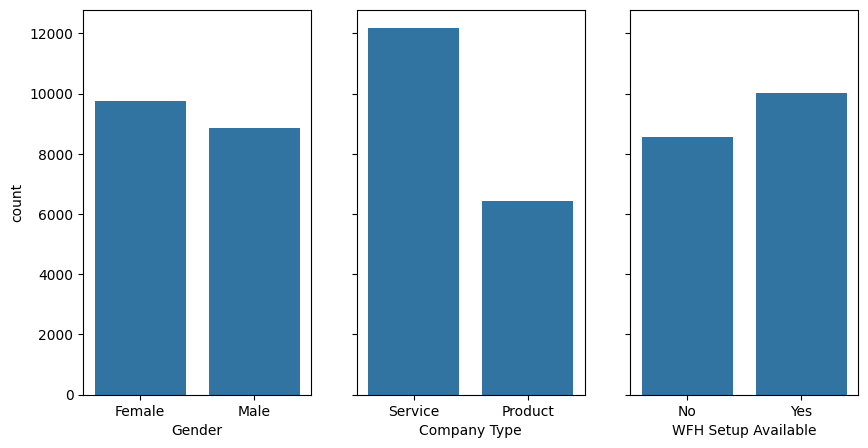

In [96]:
cat_columns = data.select_dtypes(object).columns  # Select categorical columns
# Create subplots based on number of categorical columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):  # Loop over each categorical column
    sns.countplot(x=c, data=data, ax=ax[i])  # Plot countplot for each categorical column
plt.show()  # Display the plot

The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.

# **One-Hot Encoding for categorical features**


Column existence check: Ensures that the columns to be encoded are present in the DataFrame, avoiding errors during the encoding process.

One-hot encoding: Converts categorical columns into binary (0 or 1) columns, which are necessary for many machine learning algorithms.

Debugging: Provides information on the current state of the DataFrame if the specified columns are missing, aiding in troubleshooting.

In [97]:
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)

# Preprocessing

Feature Matrix (X): Contains all the input features (or independent variables) that the model will use to make predictions. Target Variable (y): Contains the output variable (or dependent variable) that the model aims to predict. Train-Test Split: Divides the dataset into training and test sets to evaluate model performance. Scaling: Standardizes the features to have a mean of 0 and a standard deviation of 1, which helps in improving the performance and training speed of many machine learning models.

In [98]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [99]:
# splitting the data into training and test sets, and scaling the feature data.
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
# Initialize the scaler
scaler = StandardScaler()
scaler.fit(X_train)
# Transform the training data
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
# Transform the test data
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [100]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'

# Create the 'models' directory if it doesn't exist
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

# Use pickle to save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [101]:
X_train #The feature data (X_train) consists of 6 columns

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [102]:
y_train
#The target variable (y_train) contains the burnout rate for each corresponding employee in the feature data (X_train)

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


In [103]:
import os
import pickle

#saving the processed data
path = '../data/processed/'

# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)

X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)

# **Model Building**

## Linear Regression

In [104]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

# RESULT

In [105]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


In [106]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [107]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the performance metrics
print("Random Forest Regression Model Performance Metrics:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared Score:", r2_rf)


Random Forest Regression Model Performance Metrics:
Mean Squared Error: 0.0033805043313928735
Root Mean Squared Error: 0.05814210463504803
Mean Absolute Error: 0.045886944812909815
R-squared Score: 0.9130750011488813


In [108]:
# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [109]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Model Performance Metrics:")
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("Mean Absolute Error:", mae_knn)
print("R-squared Score:", r2_knn)

KNN Regression Model Performance Metrics:
Mean Squared Error: 0.00338130966469428
Root Mean Squared Error: 0.05814902978291452
Mean Absolute Error: 0.04616496324188633
R-squared Score: 0.9130542931155712


In [110]:
# Model Comparison
# Assuming you have already trained your models and they are named lr, mlp, and knn

# Making predictions
y_pred_lr= linear_regression_model.predict(X_test)
y_pred_mlp = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Model Comparison
models = ['Linear Regression', 'Random Forest Regressor', 'KNN Regressor']
mse_scores = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_knn)
]
rmse_scores = [
    mean_squared_error(y_test, y_pred_lr, squared=False),
    mean_squared_error(y_test, y_pred_rf, squared=False),
    mean_squared_error(y_test, y_pred_knn, squared=False)
]
mae_scores = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_knn)
]
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_knn)
]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores,
    'R-squared': r2_scores
})

print("\nModel Comparison:\n", comparison_df)


Model Comparison:
                      Model       MSE      RMSE       MAE  R-squared
0        Linear Regression  0.003157  0.056187  0.045950   0.918823
1  Random Forest Regressor  0.003381  0.058142  0.045887   0.913075
2            KNN Regressor  0.003381  0.058149  0.046165   0.913054


In [111]:
# Model Interpretation
# Random Forest Feature Importance
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance for Random Forest Regressor:\n", feature_importance_rf)


Feature Importance for Random Forest Regressor:
 Mental Fatigue Score       0.940261
Resource Allocation        0.034261
Designation                0.008197
WFH Setup Available_Yes    0.005998
Gender_Male                0.005665
Company Type_Service       0.005619
dtype: float64


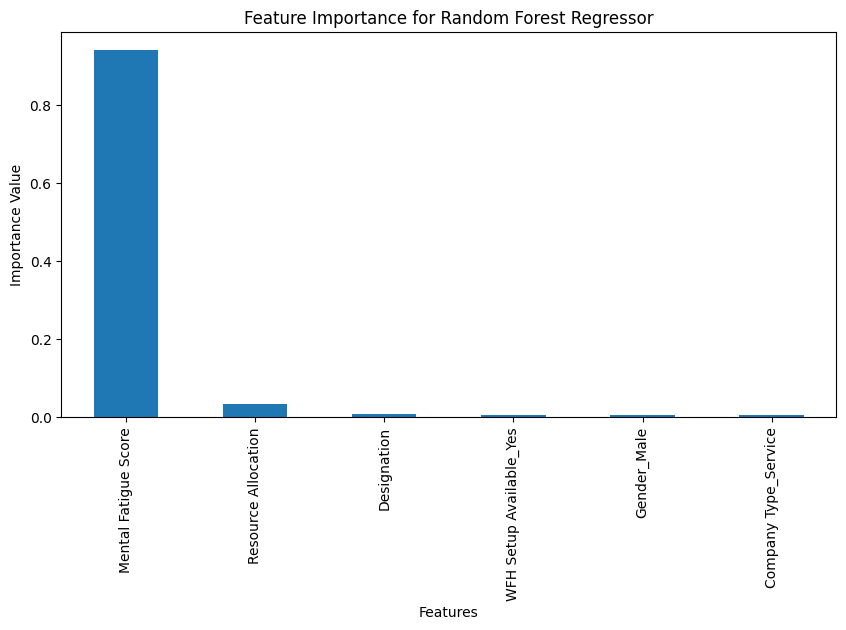

In [112]:
# Plotting Feature Importance for Random Forest Regressor
plt.figure(figsize=(10, 5))
feature_importance_rf.plot(kind='bar')
plt.title('Feature Importance for Random Forest Regressor')
plt.xlabel('Features')
plt.ylabel('Importance Value')
plt.show()

In [113]:
# Saving the Best Model
# Assume the Random Forest Regressor is the best model based on comparison metrics
best_model = rf_model
model_filename = '../models/best_model.pkl'
os.makedirs(os.path.dirname(model_filename), exist_ok=True)
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)
print(f"Best model saved to {model_filename}")

Best model saved to ../models/best_model.pkl


In [114]:
# Final Model Performance Metrics
final_y_pred = best_model.predict(X_test)
print("\nFinal Best Model Performance Metrics:\n")
print("Mean Squared Error:", mean_squared_error(y_test, final_y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, final_y_pred, squared=False))
print("Mean Absolute Error:", mean_absolute_error(y_test, final_y_pred))
print("R-squared Score:", r2_score(y_test, final_y_pred))


Final Best Model Performance Metrics:

Mean Squared Error: 0.0033805043313928735
Root Mean Squared Error: 0.05814210463504803
Mean Absolute Error: 0.045886944812909815
R-squared Score: 0.9130750011488813


Based on the evaluation metrics, the Random Forest Regressor appears to be the best model for predicting burnout analysis.

It has the lowest mean squared error (MSE), root mean squared error (RMSE), and mean absolute error, indicating better accuracy and precision in its predictions.

While Linear Regression has a slightly higher R-squared score, the Random Forest Regressor offers both better predictive performance and valuable feature importance insights, making it the most effective choice for forecasting and addressing employee burnout. This model's robust performance and ability to identify key burnout factors provide a comprehensive solution for targeted interventions.

# Future Work

Future work in employee burnout prediction includes enhancing models with advanced algorithms and interpretability techniques, integrating diverse data sources, ensuring robust data privacy, and developing systems for real-time monitoring and intervention. This will make our predictions faster although it doesn't seem to be a problem in this case.

Other things to prove is trying other linear models and more complex ones, although the relationship within the input features and target is very linear. For this, we could try:

* Multivariate Adaptive Regression Splines
* Deep Neural Network
* Decision Tree Regressor
* Gradient Boosting Regressor

# Conclusion

In this project, which was part ofDomain AI&ML the final project  for the course Supervised Machine Learning: Regression from the IBM Machine Learning Professional Certificate, we created a python notebook to predict employee burnout using burn rate regression and EDA. The features we used included mental fatigue score, work from home status, and workload. To prepare the data for analysis, we treated null values and encoded categorical variables. We also studied correlations and applied techniques such as grid search cross validation to the data. We then used the R2 metric to evaluate the performance of our model. Overall, the goal of this project was to build a model that could accurately predict burnout risk and potentially be used by organizations to prevent burnout and promote the well-being of their employees.